# Project:
**Data Description:**
The data contains features extracted from the silhouette of vehicles in different
angles. Four "Corgie" model vehicles were used for the experiment: a double
decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This
particular combination of vehicles was chosen with the expectation that the
bus, van and either one of the cars would be readily distinguishable, but it
would be more difficult to distinguish between the cars

**Domain:**
Object recognition

**Context:**
The purpose is to classify a given silhouette as one of three types of vehicle,
using a set of features extracted from the silhouette. The vehicle may be viewed
from one of many different angles

**Objective:** Apply dimensionality reduction technique – PCA and train a model using
principle components instead of training the model using just the raw data

## Question 1: Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
vehicle = pd.read_csv('vehicle.csv')

In [3]:
#Read vehicle data from csv file and display top 5 records 
vehicle.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

#### Data Exploration

In [4]:
#Get number of rows and columns of the data records/structure of the file
vehicle.shape

(846, 19)

There are 846 rows and 19 columns in total - including the target variable

In [5]:
#Get datatypes of each column - convert object data type(if any) to categorical data
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

The dataset has columns which are of integer and float types. Only the target variable('class') is of object type

In [6]:
# Checking if any missing value
vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

There is many null values present in the vehicle dataset. We need to process them further. Columns: circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about.1, skewness_about.2 have missing data

In [7]:
#Checking the unique data
vehicle.nunique()

compactness                     44
circularity                     27
distance_circularity            63
radius_ratio                   134
pr.axis_aspect_ratio            37
max.length_aspect_ratio         21
scatter_ratio                  131
elongatedness                   35
pr.axis_rectangularity          13
max.length_rectangularity       66
scaled_variance                128
scaled_variance.1              422
scaled_radius_of_gyration      143
scaled_radius_of_gyration.1     39
skewness_about                  23
skewness_about.1                41
skewness_about.2                30
hollows_ratio                   31
class                            3
dtype: int64

In [8]:
#Five point summary of  attributes and label
#Transposing index and columns
vehicle.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

scaled_variance.1 has very higher standard deviation
radius_ratio, scatter_ratio, scaled_variance, scaled_radius_of_gyration - These columns Standard Deviation is also on the higher side
skewness_about, skewness_about.1 have minimum values = 0.0 which is a possible value. These cannot be considered as blank values

In [9]:
# Lets see the value counts of the target varible - 'class'
vehicle['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

There are 429 cars, 218 buses and 199 vans

## Question 2: Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

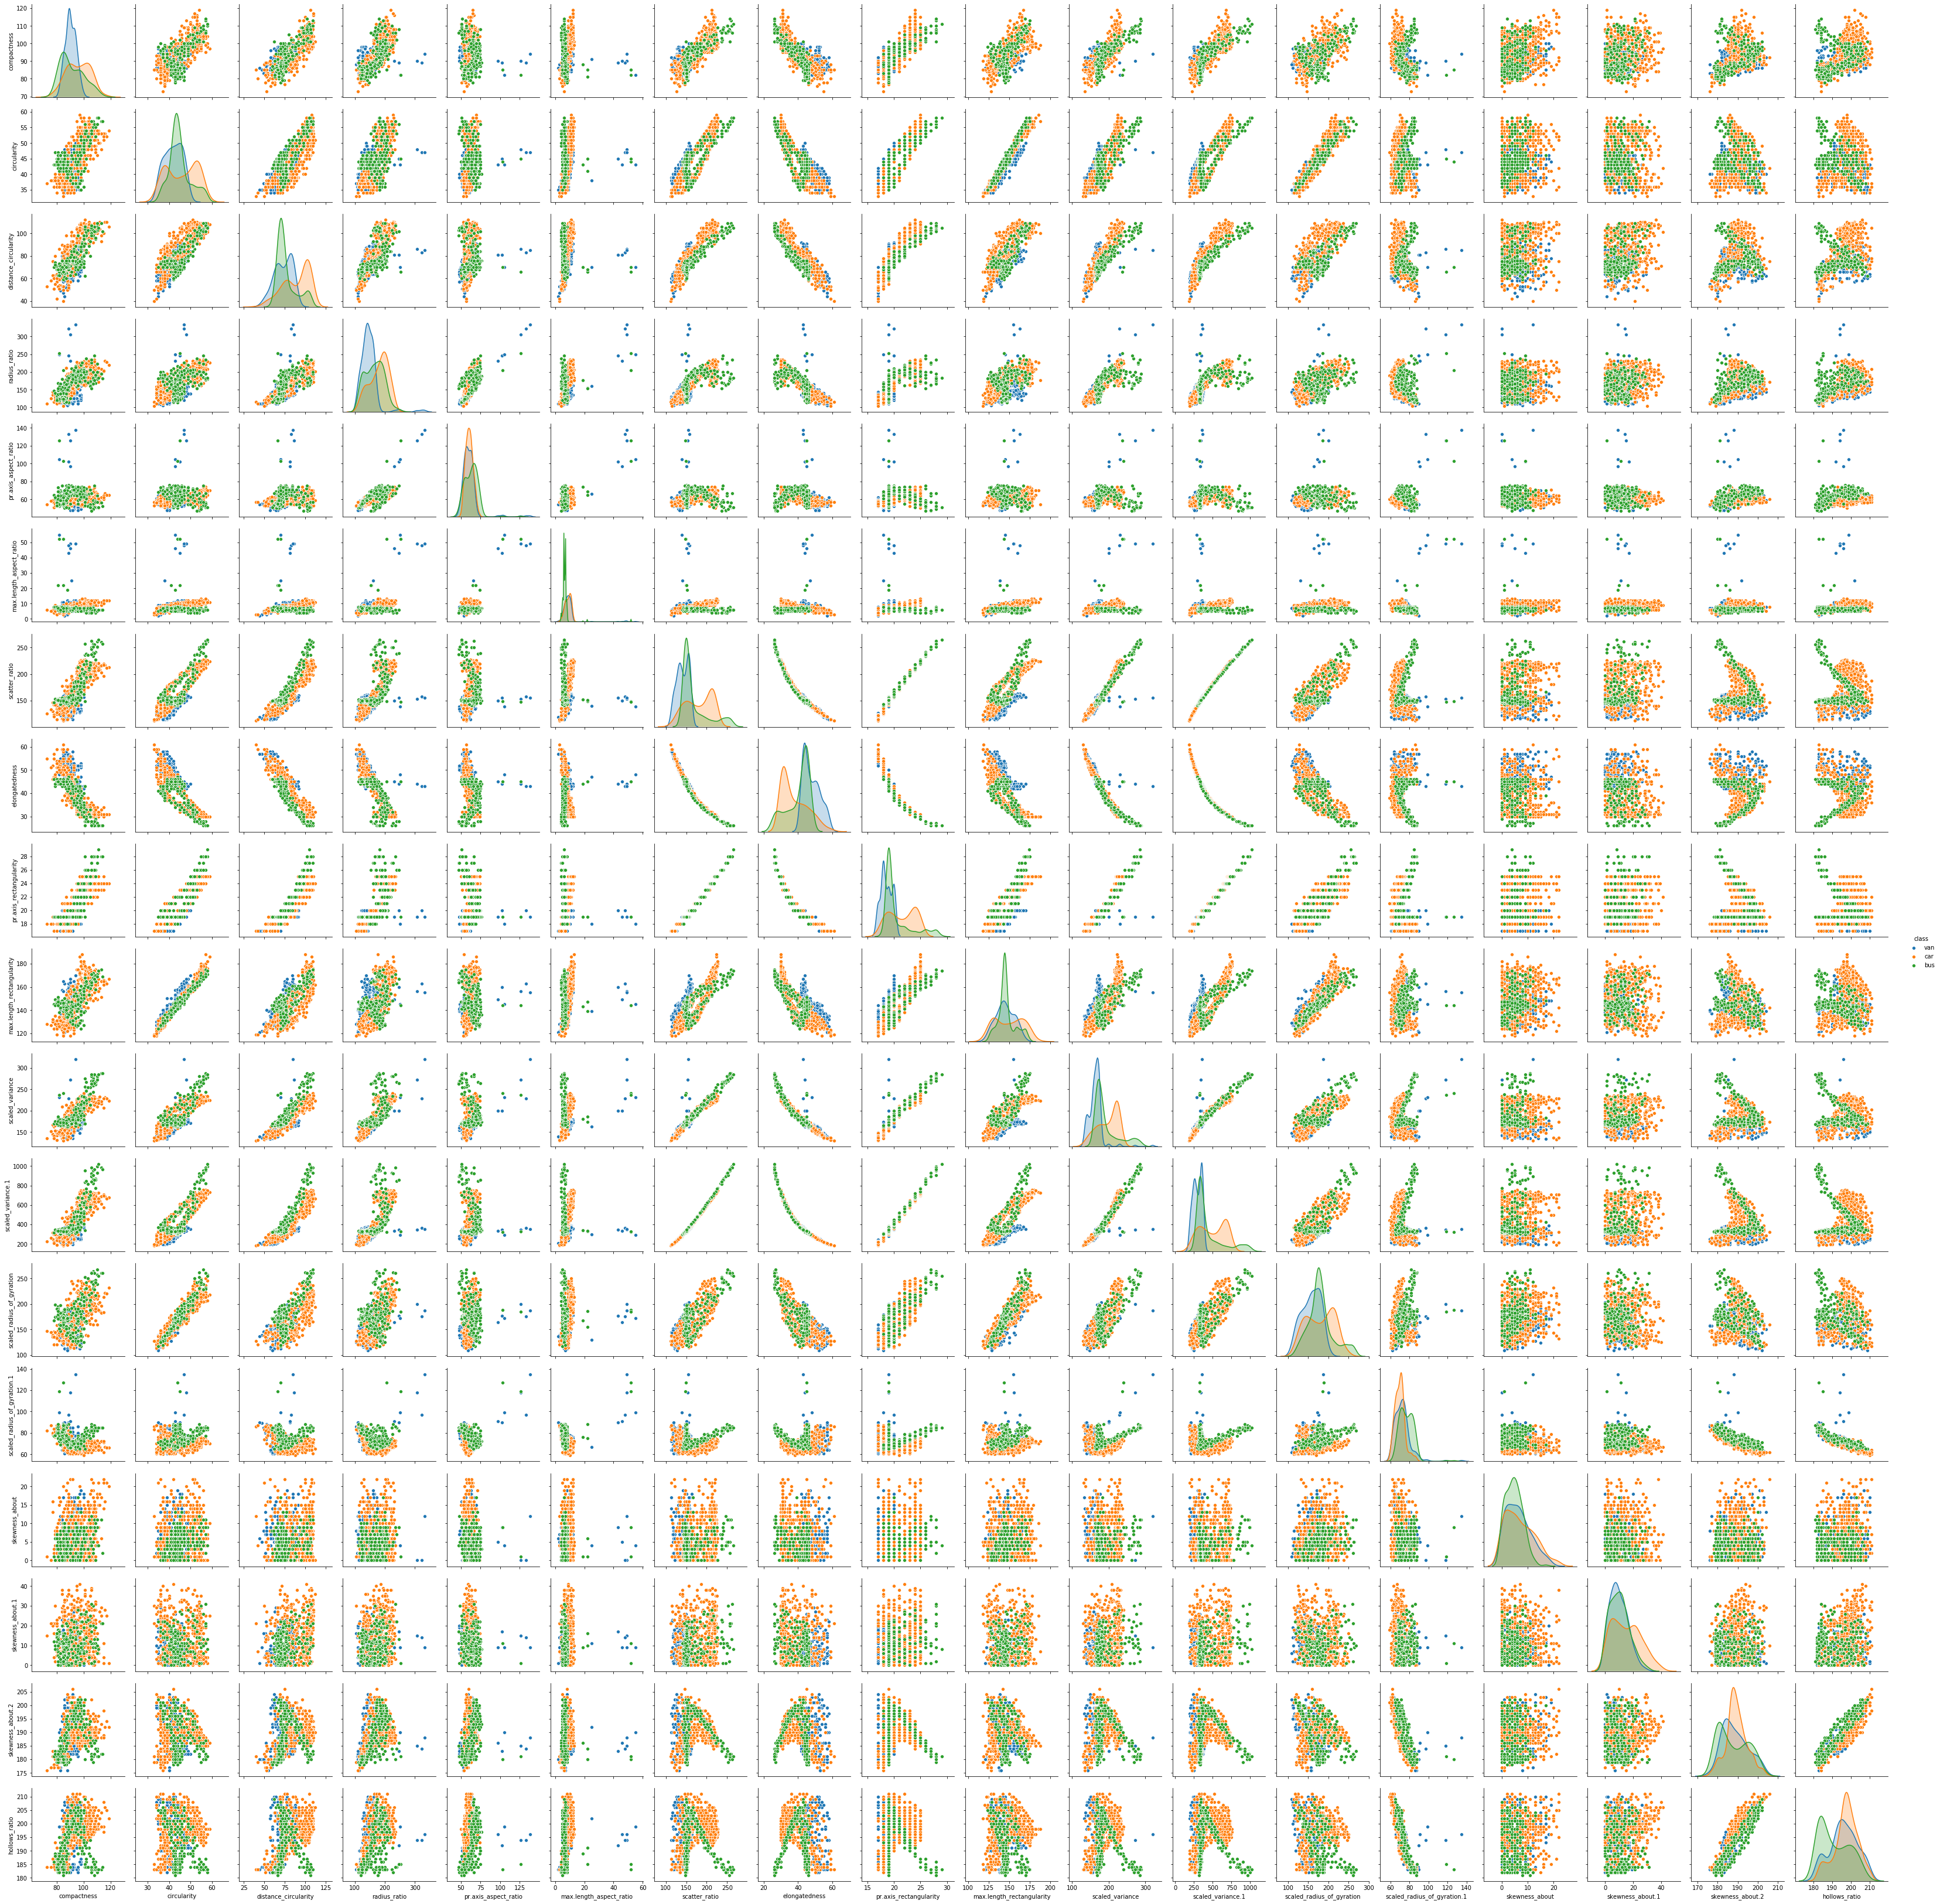

In [10]:
## Pair plot that includes all the columns of the data frame
sns.pairplot(vehicle, hue="class")

#### Correlation using Heatmap

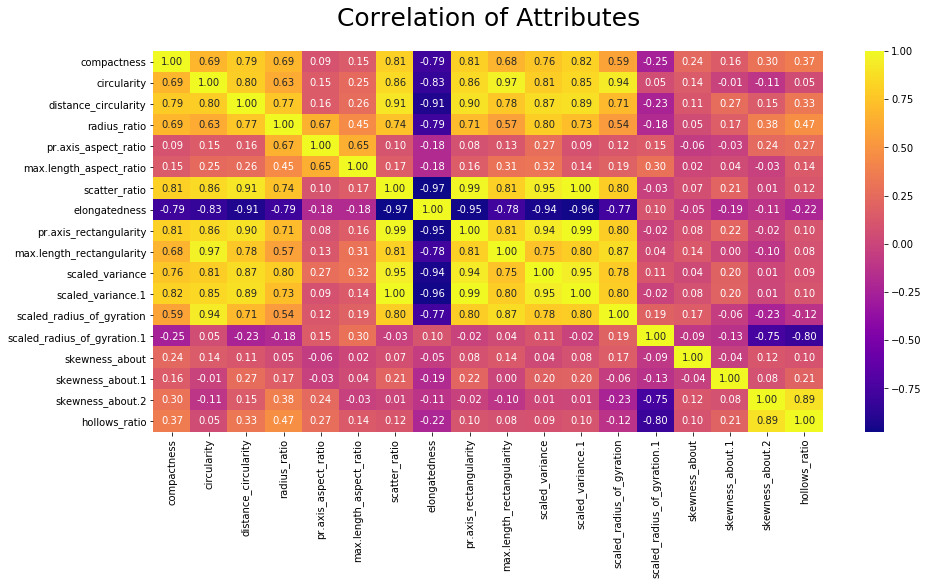

In [11]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=25)
sns.heatmap(vehicle.corr(), cmap='plasma',annot=True, fmt='.2f')

**Inference drawn from Heatmap and Pairplot:**
1. circularity and max.length_rectangularity are highly positve correlated
2. scatter_ratio is highly positive correlated with scaled_variance.1, scaled_variance, pr.axis_rectangularity and distance_rectangularity
3. pr.axis_rectangularity is highly positive correlated with scaled_variance.1, scaled_variance and scatter_ratio
4. scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2 and hollows_ratio are weakly correlated with all other columns

So our objective is to reocgnize whether an object is a van or bus or car based on some input features. so our main assumption is there is little or no multicollinearity between the features. if two features is highly correlated then there is no use in using both features. In that case, we can drop one feature. so heatmap gives us the correlation matrix there we can see which features are highly correlated. From above correlation matrix we can see that there are many features which are highly correlated. if we see carefully then scaled_variance.1 and scatter_ratio has 1 correlation and many other features also there which having more than 0.9 correlation so we will drop those columns whose correlation is +-0.9 or above. so there are 8 such columns: ->max.length_rectangularity ->scaled_radius_of_gyration ->skewness_about.2 ->scatter_ratio ->elongatedness ->pr.axis_rectangularity ->scaled_variance ->scaled_variance.1

**Analysis of each column with the help of plots**

In [12]:
# Python function to build Distribution plot and box plot
def buildPlot(columnName):
    fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
    fig.set_size_inches(20,4)
    sns.distplot(vehicle[columnName],ax=ax1)
    ax1.set_title("Distribution Plot")

    sns.boxplot(vehicle[columnName],ax=ax2)
    ax2.set_title("Box Plot")

In [13]:
columnName = 'compactness'
buildPlot(columnName)

From above we can see that there are no outliers in compactness column and it's looks like normally distributed. Also there are no missing values

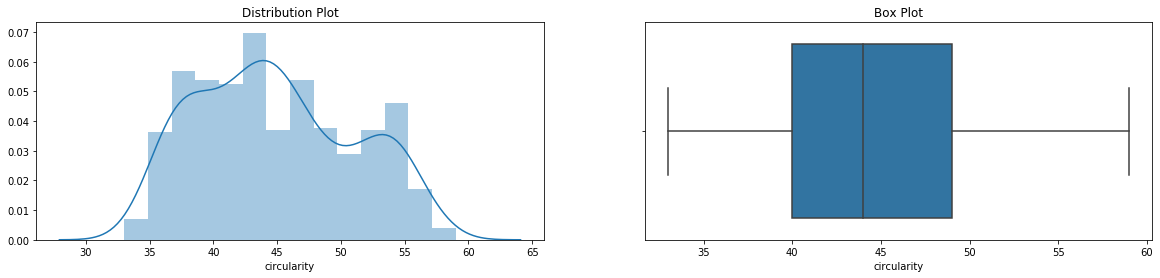

In [14]:
columnName = 'circularity'
buildPlot(columnName)

From above we can see that there are no outliers in circularity column and it looks like normally distributed. Since there are missing values, replacing them with median here.

In [15]:
vehicle['circularity'] = vehicle['circularity'].fillna(vehicle['circularity'].median())

In [16]:
columnName = 'distance_circularity'
buildPlot(columnName)

From above we can see that there are no outliers in distance_circularity column but in distribution plot we can see that there are two peaks and we can see that there is left skewness because long tail is at the left side(mean<median)
Replacing missing values with median

In [17]:
vehicle['distance_circularity'] = vehicle['distance_circularity'].fillna(vehicle['distance_circularity'].median())

In [18]:
columnName = 'radius_ratio'
buildPlot(columnName)

From above we can see that there are outliers in radius_ratio column and there is right skewness because long tail is at the right side(mean>median). As mean > median, replacing missing values with mean

In [19]:
vehicle['radius_ratio'] = vehicle['radius_ratio'].fillna(vehicle['radius_ratio'].mean())

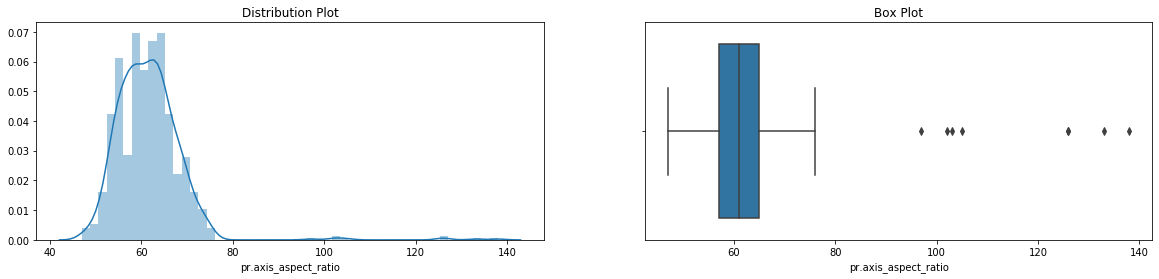

In [20]:
columnName = 'pr.axis_aspect_ratio'
buildPlot(columnName)

From above we can see that there are outliers in pr.axis_aspect_ratio column and there is right skewness because long tail is at right side(mean>median). As mean > median, replacing missing values with mean

In [21]:
vehicle['pr.axis_aspect_ratio'] = vehicle['pr.axis_aspect_ratio'].fillna(vehicle['pr.axis_aspect_ratio'].mean())

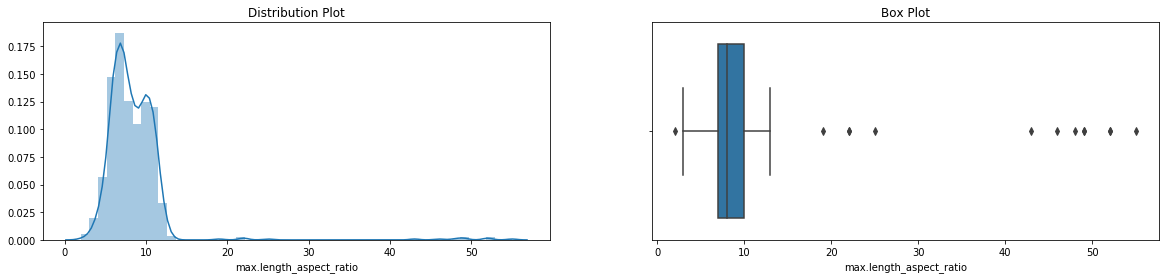

In [22]:
columnName = 'max.length_aspect_ratio'
buildPlot(columnName)

From above we can see that there are outliers in max.length_aspect_ratio and there is a right skewness because long tail is at right side(mean>median). There are no missing values for column - 'max.length_aspect_ratio'

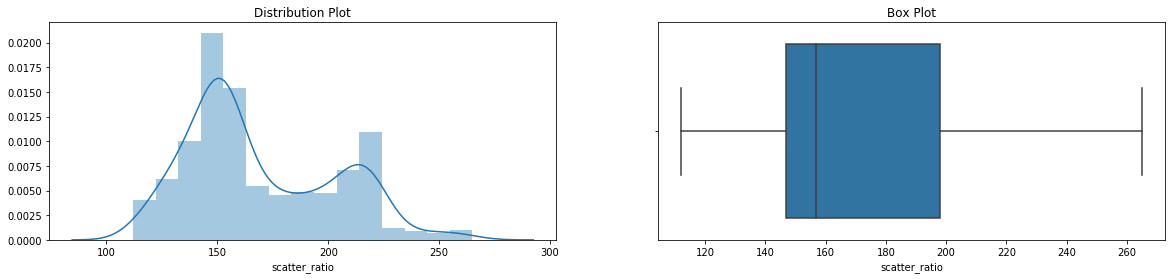

In [23]:
columnName = 'scatter_ratio'
buildPlot(columnName)

From above we can see that there are no outliers in scatter_ratio column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median). As mean > median, replacing missing values with mean

In [24]:
vehicle['scatter_ratio'] = vehicle['scatter_ratio'].fillna(vehicle['scatter_ratio'].mean())

In [25]:
columnName = 'elongatedness'
buildPlot(columnName)

From above we can see that there are no outliers in elongatedness column and there are two peaks in distribution plot and there is left skewness because long tail is at left side(mean<median). As mean < median, replacing missing values with median

In [26]:
vehicle['elongatedness'] = vehicle['elongatedness'].fillna(vehicle['elongatedness'].median())

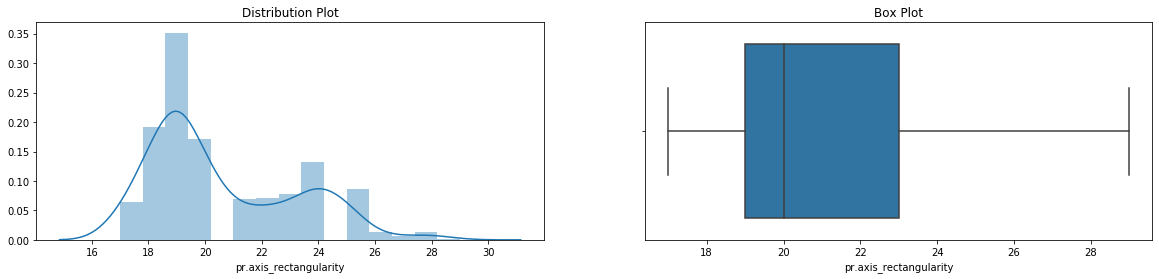

In [27]:
columnName = 'pr.axis_rectangularity'
buildPlot(columnName)

From above we can see that there are no outliers in pr.axis_rectangularity column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median). As mean > median, replacing missing values with mean

In [28]:
vehicle['pr.axis_rectangularity'] = vehicle['pr.axis_rectangularity'].fillna(vehicle['pr.axis_rectangularity'].mean())

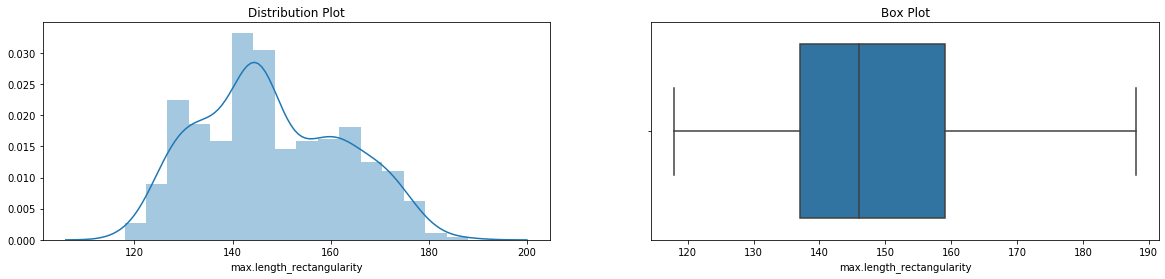

In [29]:
columnName = 'max.length_rectangularity'
buildPlot(columnName)

From above we can see that there are no outliers in max.length_rectangularity column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median). As mean > median, replacing missing values with mean

In [30]:
vehicle['max.length_rectangularity'] = vehicle['max.length_rectangularity'].fillna(vehicle['max.length_rectangularity'].mean())

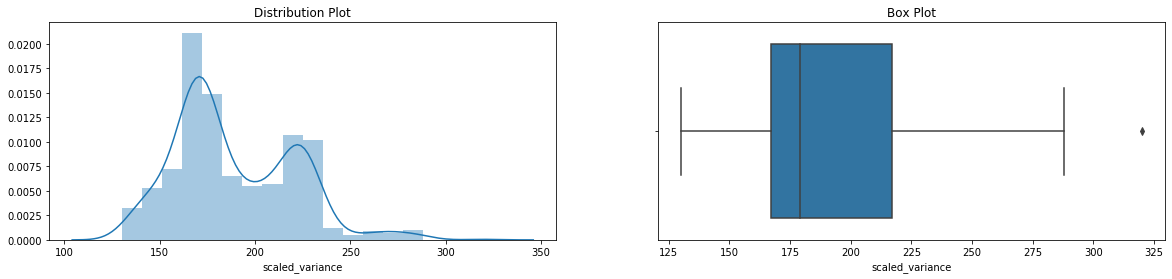

In [31]:
columnName = 'scaled_variance'
buildPlot(columnName)

From above we can see that there are outliers in scaled_variance column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median). As mean > median, replacing missing values with mean

In [32]:
vehicle['scaled_variance'] = vehicle['scaled_variance'].fillna(vehicle['scaled_variance'].mean())

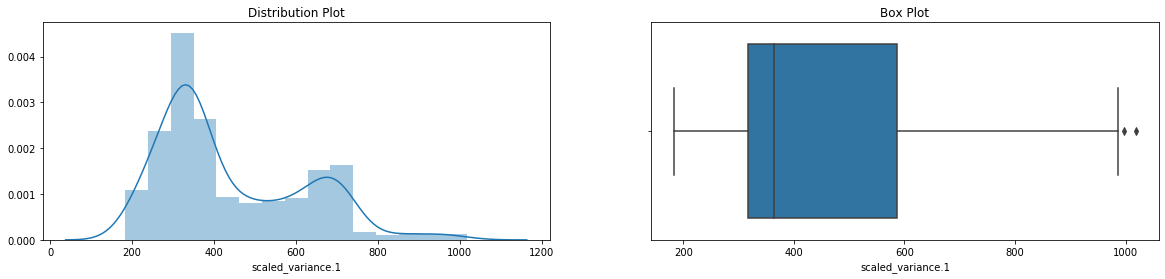

In [33]:
columnName = 'scaled_variance.1'
buildPlot(columnName)

From above we can see that there are outliers in scaled_variance.1 column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median). As mean > median, replacing missing values with mean

In [34]:
vehicle['scaled_variance.1'] = vehicle['scaled_variance.1'].fillna(vehicle['scaled_variance.1'].mean())

In [35]:
columnName = 'scaled_radius_of_gyration'
buildPlot(columnName)

From above we can see that there are no outliers in scaled_radius_of_gyration column and there is right skewness because long tail is at right side(mean>median). As mean > median, replacing missing values with mean

In [36]:
vehicle['scaled_radius_of_gyration'] = vehicle['scaled_radius_of_gyration'].fillna(vehicle['scaled_radius_of_gyration'].mean())

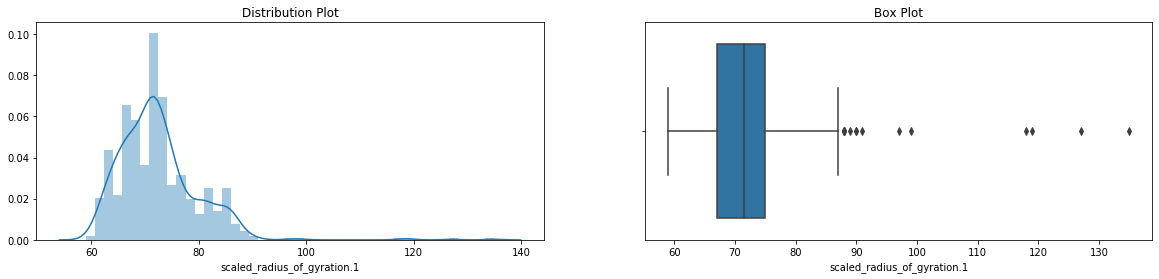

In [37]:
columnName = 'scaled_radius_of_gyration.1'
buildPlot(columnName)

From above we can see that there are outliers in scaled_radius_of_gyration.1 column and there is right skewness because long tail is at right side(mean>median). As mean > median, replacing missing values with mean

In [38]:
vehicle['scaled_radius_of_gyration.1'] = vehicle['scaled_radius_of_gyration.1'].fillna(vehicle['scaled_radius_of_gyration.1'].mean())

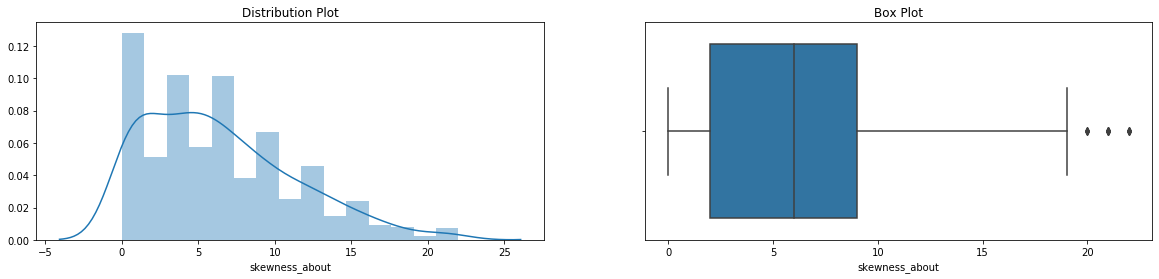

In [39]:
columnName = 'skewness_about'
buildPlot(columnName)

From above we can see that there are outliers in skewness_about column and there is right skewness because long tail is at right side(mean>median). As mean > median, replacing missing values with mean

In [40]:
vehicle['skewness_about'] = vehicle['skewness_about'].fillna(vehicle['skewness_about'].mean())

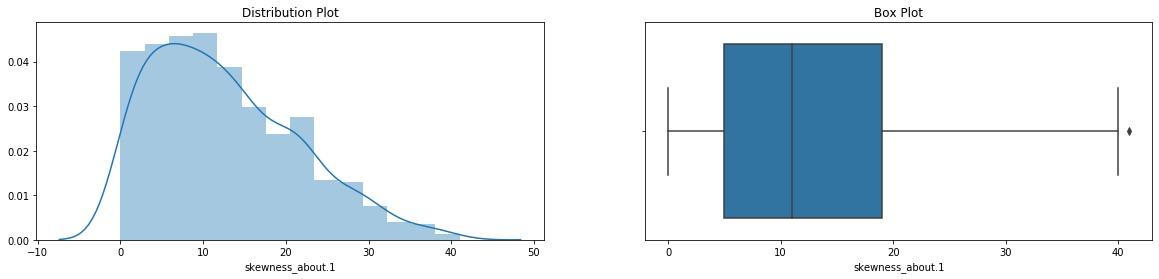

In [41]:
columnName = 'skewness_about.1'
buildPlot(columnName)

From above we can see that there are outliers in skewness_about.1 column and there is right skewness because long tail is at right side(mean>median). As mean > median, replacing missing values with mean

In [42]:
vehicle['skewness_about.1'] = vehicle['skewness_about.1'].fillna(vehicle['skewness_about.1'].mean())

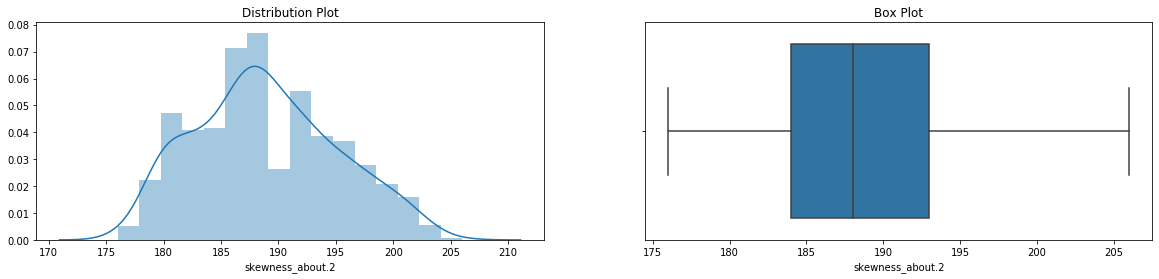

In [43]:
columnName = 'skewness_about.2'
buildPlot(columnName)

From above we can see that there are no outliers in skewness_about.2 column and there is left skewness because long tail is at left side(mean<median). As mean < median, replacing missing values with median

In [44]:
vehicle['skewness_about.2'] = vehicle['skewness_about.2'].fillna(vehicle['skewness_about.2'].median())

In [45]:
columnName = 'hollows_ratio'
buildPlot(columnName)

From above we can see that there are no outliers in hollows_ratio column and there is left skewness because long tail is at left side(mean<median)
There are no missing values for column - hollows_ratio

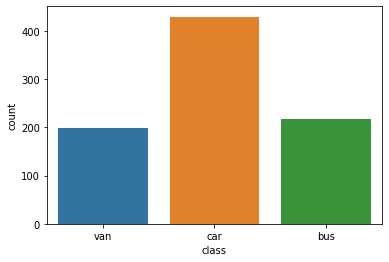

In [46]:
sns.countplot(vehicle['class'])
plt.show()

In [47]:
vehicle.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

## Question: Split the data into train and test

In [48]:
#Droping the output column
vehicle_df = vehicle
cols=['class']
X = vehicle_df.drop(cols,axis=1) 
y = vehicle_df['class'] #Predicted Output column

In [49]:
#Scale the data before applying an algorithm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
XScaled = scaler.fit_transform(X)

In [50]:
#Spliting the data into 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.3, random_state=1)

In [51]:
#Checking % of data split 
print("{0:0.2f}% data is in training set".format((len(X_train)/len(vehicle_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(vehicle_df.index)) * 100))

69.98% data is in training set
30.02% data is in test set


We have already seen below points in the above steps :

* We have already scaled the data, now we will feed the scaled data to our model
* X_train, X_test, y_train, y_test are variables on which we will further build our models

## Question: Train a Support vector machine using the train set and get the accuracy on the test set

**SVM Algorithm Model**

**kernel='linear'**

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Building a Support Vector Machine on train data
svc_model = SVC(kernel='linear',random_state=1)
svc_model.fit(X_train, y_train)

y_predict_svm_linear = svc_model.predict(X_test)

In [53]:
# check the accuracy on the training set
acc_SVM_linear_train = svc_model.score(X_train, y_train)
print("Accuracy of SVM on train set: {0:.4f}".format(acc_SVM_linear_train))
acc_SVM_linear_test = svc_model.score(X_test, y_test)
print("Accuracy of SVM on test set: {0:.4f}".format(acc_SVM_linear_test))

Accuracy of SVM on train set: 0.9662
Accuracy of SVM on test set: 0.9449


**kernel='rbf'**

In [54]:
# Building a Support Vector Machine on train data with kernel = 'rbf'
svc_model = SVC(kernel='rbf',random_state=1)
svc_model.fit(X_train, y_train)

y_predict_svm_rbf = svc_model.predict(X_test)

In [55]:
# check the accuracy on the training set
acc_SVM_rbf_train = svc_model.score(X_train, y_train)
print("Accuracy of SVM on train set: {0:.4f}".format(acc_SVM_rbf_train))
acc_SVM_rbf_test = svc_model.score(X_test, y_test)
print("Accuracy of SVM on test set: {0:.4f}".format(acc_SVM_rbf_test))

Accuracy of SVM on train set: 0.9730
Accuracy of SVM on test set: 0.9528


**kernel='poly'**

In [56]:
#Building a Support Vector Machine on train data(changing the kernel)
svc_model  = SVC(kernel='poly',random_state=1)
svc_model.fit(X_train, y_train)

y_predict_svm_poly = svc_model.predict(X_test)

In [57]:
# check the accuracy on the training set
acc_SVM_poly_train = svc_model.score(X_train, y_train)
print("Accuracy of SVM on train set: {0:.4f}".format(acc_SVM_poly_train))
acc_SVM_poly_test = svc_model.score(X_test, y_test)
print("Accuracy of SVM on test set: {0:.4f}".format(acc_SVM_poly_test))

Accuracy of SVM on train set: 0.8581
Accuracy of SVM on test set: 0.7953


**kernel='sigmoid'**

In [58]:
#Building a Support Vector Machine on train data(changing the kernel)
svc_model = SVC(kernel='sigmoid',random_state=1)
svc_model.fit(X_train, y_train)

y_predict_svm_sigmoid = svc_model.predict(X_test)

In [59]:
# check the accuracy on the training set
acc_SVM_sigmoid_train = svc_model.score(X_train, y_train)
print("Accuracy of SVM on train set: {0:.4f}".format(acc_SVM_sigmoid_train))
acc_SVM_sigmoid_test = svc_model.score(X_test, y_test)
print("Accuracy of SVM on test set: {0:.4f}".format(acc_SVM_sigmoid_test))

Accuracy of SVM on train set: 0.6791
Accuracy of SVM on test set: 0.7047


**Observation:** 
* Accuracy of SVM on test set is as below:
 - kernel='linear' : 0.9449
 - kernel='rbf' : 0.9528
 - kernel='poly' : 0.7953
 - kernel='sigmoid' : 0.7047
 
 Accuracy of SVM with kernel='linear' and 'rbf' gives best results
 
**We'll chose SVM with kernel='rbf' as the best model and it best results both on training and testing data. There is no overfit or underfit**

## Question: Perform K-fold cross validation and get the cross validation score of the model

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model = SVC(kernel='rbf',random_state=1)
kfold_results_raw = cross_val_score(model, XScaled, y, cv=kfold)
print(kfold_results_raw)
print("Accuracy: %.3f%% (%.3f%%)" % (kfold_results_raw.mean()*100.0, kfold_results_raw.std()*100.0))

[1.         1.         1.         0.94117647 0.94117647 1.
 0.94117647 1.         1.         0.94117647 1.         1.
 1.         1.         1.         0.94117647 0.94117647 1.
 0.94117647 1.         0.94117647 1.         1.         0.94117647
 1.         0.88235294 0.94117647 1.         0.82352941 0.94117647
 1.         0.94117647 1.         0.94117647 0.94117647 0.94117647
 0.94117647 0.88235294 1.         0.94117647 1.         0.88235294
 0.94117647 1.         0.94117647 1.         0.9375     0.9375
 1.         1.        ]
Accuracy: 96.456% (4.085%)


The K-fold validation using SVM algorithm gives an Accuracy of 96.456% with standard deviation of +-4.085%

## Question: Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data

**First, Lets scale the original data using StandardScaler or zscore which we have already done in the above steps and stored in XScaled**

In [62]:
# Import the PCA and print the covariance matrix
from sklearn.decomposition import PCA
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69065619  0.09181254  0.14842463
   0.81319623 -0.78968322  0.81459888  0.67694334  0.76367265  0.81686705
   0.58584865 -0.25036693  0.23596607  0.15757316  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.62190544  0.15423362  0.25176438
   0.84825602 -0.82244387  0.84493126  0.96245572  0.79693814  0.83847855
   0.92688699  0.05163492  0.1442571  -0.01148089 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76824213  0.15875349  0.26499957
   0.90543039 -0.9123854   0.89410614  0.77544391  0.86297656  0.8883556
   0.70655406 -0.22662473  0.1136663   0.26614817  0.14627113  0.33312625]
 [ 0.69065619  0.62190544  0.76824213  1.00118343  0.6643445   0.45056889
   0.73509724 -0.79069559  0.70912305  0.56987817  0.79498064  0.72100219
   0.5371705  -0.1810333   0.04877731  0.17403799  0.38270852  0.47181974]
 [ 0.09181254  0.15423362  0.15875349  0.6643445   1.00118343  0.64947191
   0.1038381  -0.18346052  0.079489

In [63]:
# Apply PCA on all the 18 components of the vehicle dataset on the scaled data
pca = PCA(n_components=18,random_state=1)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=1,
    svd_solver='auto', tol=0.0, whiten=False)

In [64]:
# Print The eigen Values
print(pca.explained_variance_)

[9.40732287e+00 3.01524437e+00 1.90342173e+00 1.18021114e+00
 9.17203829e-01 5.39655218e-01 3.58807716e-01 2.21671639e-01
 1.60193548e-01 9.17757135e-02 6.64070727e-02 4.61841958e-02
 3.54262645e-02 2.70726864e-02 2.07557352e-02 1.76150448e-02
 9.24021285e-03 3.09278571e-03]


In [65]:
# Print the eigen Vectors
print(pca.components_)

[[ 2.75284100e-01  2.93208435e-01  3.04569232e-01  2.67651957e-01
   8.05439001e-02  9.72501852e-02  3.16871188e-01 -3.14081150e-01
   3.13947050e-01  2.82796380e-01  3.09310454e-01  3.14146337e-01
   2.71979760e-01 -2.10044725e-02  4.13301282e-02  5.83587278e-02
   3.03131721e-02  7.41879143e-02]
 [-1.26863077e-01  1.25667551e-01 -7.28663170e-02 -1.89477050e-01
  -1.22080660e-01  1.08271863e-02  4.82296893e-02  1.26562779e-02
   6.02178721e-02  1.16301169e-01  6.19643227e-02  5.34578773e-02
   2.09416637e-01  4.88629943e-01 -5.49540588e-02 -1.24061210e-01
  -5.40911815e-01 -5.40309564e-01]
 [-1.19918232e-01 -2.47748757e-02 -5.59634134e-02  2.75028598e-01
   6.42060814e-01  5.91787901e-01 -9.77430490e-02  5.75557156e-02
  -1.09599153e-01 -1.70302487e-02  5.63721411e-02 -1.08803407e-01
  -3.14136856e-02  2.86140584e-01 -1.15648496e-01 -7.55725509e-02
   8.84609598e-03  3.95793032e-02]
 [ 7.82287145e-02  1.87620511e-01 -7.11429683e-02 -4.23239839e-02
   3.27496024e-02  3.10795020e-02 -9.

In [66]:
# Print the percentage of variation explained by each eigen Vector
print(pca.explained_variance_ratio_)

[5.22011283e-01 1.67315570e-01 1.05620657e-01 6.54897829e-02
 5.08955369e-02 2.99454071e-02 1.99101996e-02 1.23005342e-02
 8.88912190e-03 5.09262397e-03 3.68492096e-03 2.56275581e-03
 1.96579942e-03 1.50226031e-03 1.15173340e-03 9.77456847e-04
 5.12738368e-04 1.71618330e-04]


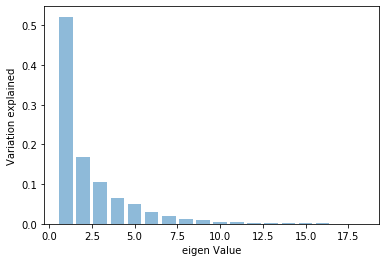

In [67]:
# Plot the Eigen Value vs Variation explained bar chart
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

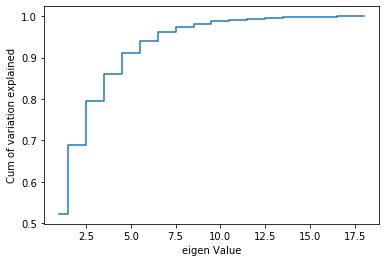

In [68]:
# Plot the Eigen Value vs Cummulative of variation explained step chart
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

**Dimensionality Reduction:**
From the above 2 charts, its clearly evident that 8 dimensions seems very reasonable. With 8 variables we can explain over 95% of the variation in the original data

In [69]:
# New pca with 7 dimensions - after Dimensionality Reduction
pca_new = PCA(n_components=8,random_state=1)
pca_new.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=1,
    svd_solver='auto', tol=0.0, whiten=False)

In [70]:
# Print the new eigen Vectors
print(pca_new.components_)

[[ 2.75284100e-01  2.93208435e-01  3.04569232e-01  2.67651957e-01
   8.05439001e-02  9.72501852e-02  3.16871188e-01 -3.14081150e-01
   3.13947050e-01  2.82796380e-01  3.09310454e-01  3.14146337e-01
   2.71979760e-01 -2.10044725e-02  4.13301282e-02  5.83587278e-02
   3.03131721e-02  7.41879143e-02]
 [-1.26863077e-01  1.25667551e-01 -7.28663170e-02 -1.89477050e-01
  -1.22080660e-01  1.08271863e-02  4.82296893e-02  1.26562779e-02
   6.02178721e-02  1.16301169e-01  6.19643227e-02  5.34578773e-02
   2.09416637e-01  4.88629943e-01 -5.49540588e-02 -1.24061210e-01
  -5.40911815e-01 -5.40309564e-01]
 [-1.19918232e-01 -2.47748757e-02 -5.59634134e-02  2.75028598e-01
   6.42060814e-01  5.91787901e-01 -9.77430490e-02  5.75557156e-02
  -1.09599153e-01 -1.70302487e-02  5.63721411e-02 -1.08803407e-01
  -3.14136856e-02  2.86140584e-01 -1.15648496e-01 -7.55725509e-02
   8.84609598e-03  3.95793032e-02]
 [ 7.82287145e-02  1.87620511e-01 -7.11429683e-02 -4.23239839e-02
   3.27496024e-02  3.10795020e-02 -9.

In [71]:
# Print the new eigen values
print(pca_new.explained_variance_ratio_)

[0.52201128 0.16731557 0.10562066 0.06548978 0.05089554 0.02994541
 0.0199102  0.01230053]


In [72]:
Xpca_new = pca_new.transform(XScaled)
Xpca_new

array([[ 3.32921773e-01, -2.18908770e-01,  1.00146141e+00, ...,
        -7.56493132e-01, -9.01348795e-01, -3.82261716e-01],
       [-1.59310839e+00, -4.21152773e-01, -3.69202189e-01, ...,
        -5.18673656e-01,  3.77481811e-01,  2.47482912e-01],
       [ 3.76799100e+00,  1.95866713e-01,  8.79847172e-02, ...,
         7.04566965e-01, -3.31099040e-02,  4.84014434e-01],
       ...,
       [ 4.80827441e+00, -7.72525241e-04,  5.32540602e-01, ...,
        -2.18979200e-01,  5.73317629e-01,  1.10797101e-01],
       [-3.29488718e+00, -1.00945923e+00, -3.57609032e-01, ...,
        -4.03134986e-01, -2.04070765e-01,  3.20231036e-01],
       [-4.76624732e+00,  3.33498915e-01, -5.68786243e-01, ...,
        -3.36424096e-01,  5.72585356e-02, -2.47923653e-01]])

In [73]:
Xpca_new = pca_new.transform(XScaled)

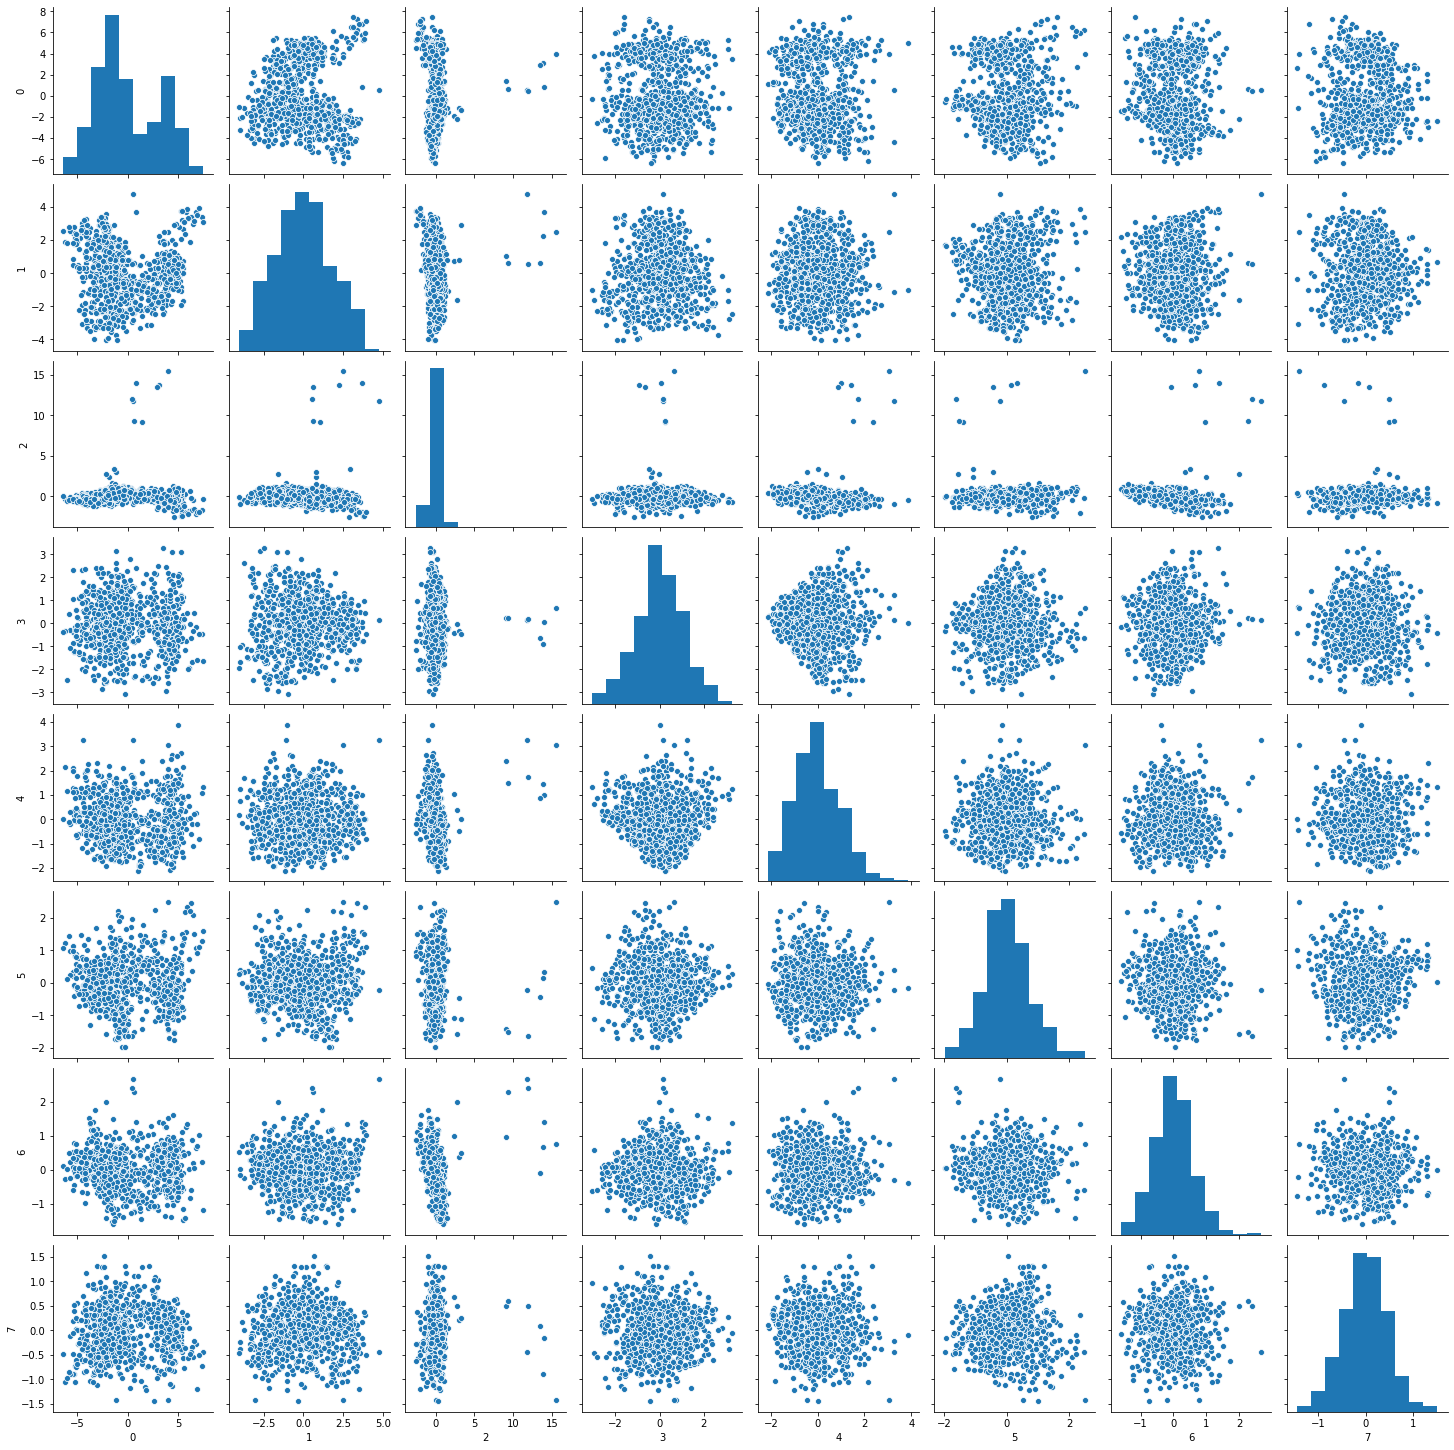

In [74]:
# Pairplot
sns.pairplot(pd.DataFrame(Xpca_new))

## Question: Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier

**Repeating Step 3: Split the data into train and test**

In [75]:
X_trainNew, X_testNew, y_trainNew, y_testNew = train_test_split(Xpca_new, y, test_size=0.3, random_state=1)

In [76]:
#Checking % of data split 
print("{0:0.2f}% data is in training set".format((len(X_trainNew)/len(vehicle_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_testNew)/len(vehicle_df.index)) * 100))

69.98% data is in training set
30.02% data is in test set


**Repeating Step 4 : Train a Support vector machine using the train set and get the accuracy on the test set**

**kernel='linear'**

In [88]:
# Building a Support Vector Machine on train data with kernel = 'linear'
svc_model = SVC(kernel='linear',random_state=1)
svc_model.fit(X_trainNew, y_trainNew)

y_predict_svm_linear_pca = svc_model.predict(X_testNew)
y_predict_svm_linear_pca

array(['van', 'bus', 'bus', 'bus', 'car', 'car', 'van', 'van', 'van',
       'van', 'van', 'van', 'car', 'bus', 'bus', 'car', 'van', 'bus',
       'van', 'bus', 'car', 'car', 'car', 'car', 'van', 'van', 'bus',
       'car', 'car', 'car', 'car', 'van', 'car', 'car', 'van', 'car',
       'bus', 'car', 'bus', 'bus', 'car', 'van', 'van', 'car', 'van',
       'van', 'van', 'bus', 'car', 'car', 'car', 'car', 'bus', 'car',
       'car', 'van', 'car', 'car', 'van', 'bus', 'car', 'van', 'car',
       'van', 'bus', 'car', 'car', 'car', 'car', 'bus', 'car', 'van',
       'car', 'van', 'bus', 'car', 'car', 'car', 'van', 'car', 'car',
       'bus', 'car', 'car', 'bus', 'car', 'van', 'car', 'bus', 'bus',
       'car', 'bus', 'bus', 'van', 'van', 'van', 'van', 'bus', 'bus',
       'car', 'bus', 'car', 'car', 'van', 'van', 'car', 'car', 'car',
       'car', 'car', 'car', 'bus', 'car', 'car', 'car', 'van', 'car',
       'van', 'van', 'car', 'car', 'van', 'car', 'car', 'bus', 'car',
       'van', 'car',

In [89]:
# check the accuracy on the training and test set
acc_SVM_linear_train_pca = svc_model.score(X_trainNew, y_trainNew)
print("Accuracy of SVM on train set: {0:.4f}".format(acc_SVM_linear_train_pca))
acc_SVM_linear_test_pca = svc_model.score(X_testNew, y_testNew)
print("Accuracy of SVM on test set: {0:.4f}".format(acc_SVM_linear_test_pca))

Accuracy of SVM on train set: 0.8801
Accuracy of SVM on test set: 0.8622


**kernel='rbf'**

In [90]:
# Building a Support Vector Machine on train data with kernel='rbf'
svc_model = SVC(kernel='rbf',random_state=1)
svc_model.fit(X_trainNew, y_trainNew)

y_predict_svm_rbf_pca = svc_model.predict(X_testNew)
y_predict_svm_rbf_pca

array(['van', 'bus', 'bus', 'bus', 'car', 'car', 'van', 'van', 'van',
       'van', 'van', 'van', 'bus', 'car', 'bus', 'car', 'van', 'bus',
       'van', 'bus', 'car', 'car', 'car', 'car', 'van', 'van', 'bus',
       'car', 'car', 'car', 'car', 'van', 'bus', 'car', 'bus', 'car',
       'bus', 'car', 'bus', 'bus', 'car', 'van', 'van', 'car', 'van',
       'van', 'car', 'car', 'car', 'car', 'car', 'car', 'bus', 'car',
       'car', 'van', 'car', 'car', 'van', 'bus', 'car', 'van', 'car',
       'van', 'bus', 'car', 'car', 'car', 'car', 'bus', 'car', 'van',
       'car', 'van', 'bus', 'car', 'car', 'car', 'van', 'car', 'car',
       'van', 'car', 'car', 'bus', 'car', 'van', 'car', 'bus', 'bus',
       'car', 'bus', 'van', 'car', 'van', 'van', 'bus', 'bus', 'bus',
       'car', 'car', 'car', 'van', 'van', 'van', 'car', 'car', 'car',
       'car', 'car', 'car', 'bus', 'car', 'car', 'car', 'van', 'car',
       'van', 'van', 'car', 'car', 'van', 'car', 'van', 'car', 'car',
       'van', 'car',

In [91]:
# check the accuracy on the training and test set
acc_SVM_rbf_train_pca = svc_model.score(X_trainNew, y_trainNew)
print("Accuracy of SVM on train set: {0:.4f}".format(acc_SVM_rbf_train_pca))
acc_SVM_rbf_test_pca = svc_model.score(X_testNew, y_testNew)
print("Accuracy of SVM on test set: {0:.4f}".format(acc_SVM_rbf_test_pca))

Accuracy of SVM on train set: 0.9611
Accuracy of SVM on test set: 0.9409


**kernel='poly'**

In [92]:
# Building a Support Vector Machine on train data with kernel='poly'
svc_model = SVC(kernel='poly',random_state=1)
svc_model.fit(X_trainNew, y_trainNew)

y_predict_svm_poly_pca = svc_model.predict(X_testNew)
y_predict_svm_poly_pca

array(['van', 'bus', 'car', 'car', 'car', 'car', 'car', 'car', 'van',
       'van', 'van', 'car', 'car', 'car', 'car', 'car', 'car', 'car',
       'van', 'bus', 'car', 'car', 'car', 'car', 'car', 'van', 'car',
       'car', 'car', 'car', 'car', 'van', 'car', 'car', 'van', 'car',
       'car', 'car', 'bus', 'car', 'car', 'car', 'van', 'car', 'car',
       'van', 'bus', 'bus', 'car', 'car', 'car', 'car', 'car', 'car',
       'car', 'car', 'car', 'car', 'van', 'bus', 'car', 'van', 'car',
       'van', 'bus', 'car', 'car', 'car', 'car', 'bus', 'car', 'car',
       'car', 'car', 'bus', 'car', 'car', 'car', 'car', 'car', 'car',
       'car', 'car', 'car', 'bus', 'car', 'van', 'car', 'car', 'bus',
       'car', 'car', 'car', 'van', 'van', 'car', 'bus', 'bus', 'bus',
       'car', 'car', 'car', 'van', 'van', 'car', 'car', 'car', 'car',
       'car', 'car', 'car', 'car', 'car', 'car', 'car', 'van', 'car',
       'van', 'van', 'car', 'car', 'car', 'car', 'van', 'bus', 'car',
       'van', 'car',

In [93]:
# check the accuracy on the training and test set
acc_SVM_poly_train_pca = svc_model.score(X_trainNew, y_trainNew)
print("Accuracy of SVM on train set: {0:.4f}".format(acc_SVM_poly_train_pca))
acc_SVM_poly_test_pca = svc_model.score(X_testNew, y_testNew)
print("Accuracy of SVM on test set: {0:.4f}".format(acc_SVM_poly_test_pca))

Accuracy of SVM on train set: 0.7770
Accuracy of SVM on test set: 0.7441


**kernel='sigmoid'**

In [94]:
# Building a Support Vector Machine on train data with kernel='poly'
svc_model = SVC(kernel='sigmoid',random_state=1)
svc_model.fit(X_trainNew, y_trainNew)

y_predict_svm_sigmoid_pca = svc_model.predict(X_testNew)
y_predict_svm_sigmoid_pca

array(['van', 'car', 'bus', 'bus', 'car', 'car', 'van', 'van', 'van',
       'van', 'bus', 'van', 'car', 'bus', 'bus', 'car', 'car', 'car',
       'car', 'car', 'car', 'car', 'car', 'car', 'car', 'bus', 'bus',
       'car', 'bus', 'car', 'bus', 'van', 'car', 'bus', 'van', 'car',
       'bus', 'car', 'bus', 'car', 'car', 'van', 'bus', 'car', 'bus',
       'van', 'bus', 'bus', 'car', 'bus', 'bus', 'car', 'bus', 'car',
       'car', 'van', 'car', 'bus', 'van', 'bus', 'car', 'van', 'bus',
       'van', 'bus', 'bus', 'car', 'car', 'car', 'bus', 'car', 'car',
       'car', 'van', 'bus', 'car', 'car', 'car', 'car', 'bus', 'bus',
       'bus', 'car', 'bus', 'bus', 'bus', 'bus', 'car', 'bus', 'bus',
       'car', 'bus', 'bus', 'bus', 'bus', 'car', 'van', 'bus', 'car',
       'car', 'car', 'car', 'bus', 'car', 'bus', 'car', 'car', 'car',
       'car', 'car', 'car', 'bus', 'car', 'bus', 'car', 'van', 'van',
       'van', 'van', 'car', 'car', 'bus', 'bus', 'car', 'bus', 'van',
       'van', 'car',

In [95]:
# check the accuracy on the training and test set
acc_SVM_sigmoid_train_pca = svc_model.score(X_trainNew, y_trainNew)
print("Accuracy of SVM on train set: {0:.4f}".format(acc_SVM_sigmoid_train_pca))
acc_SVM_sigmoid_test_pca = svc_model.score(X_testNew, y_testNew)
print("Accuracy of SVM on test set: {0:.4f}".format(acc_SVM_sigmoid_test_pca))

Accuracy of SVM on train set: 0.6098
Accuracy of SVM on test set: 0.6024


**Observation:**

Accuracy of SVM on test set is as below:

- kernel='linear' : 86.22%
- kernel='rbf' : 94.09%
- kernel='poly' : 74.41%
- kernel='sigmoid' : 0.6024%

Accuracy of SVM with kernel='linear' and 'rbf' gives best results

We'll chose SVM with kernel='rbf' as the best model and it best results both on training and testing data. There is no overfit or underfit

**Repeating Step 5 : Perform K-fold cross validation and get the cross validation score of the model**

In [96]:
num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model = SVC(kernel='rbf',random_state=1)
kfold_results_pca = cross_val_score(model, Xpca_new, y, cv=kfold)
print(kfold_results_pca)
print("Accuracy: %.3f%% (%.3f%%)" % (kfold_results_pca.mean()*100.0, kfold_results_pca.std()*100.0))

[0.94117647 1.         0.94117647 0.94117647 0.94117647 0.94117647
 0.94117647 1.         0.94117647 0.88235294 1.         0.94117647
 0.88235294 1.         1.         0.94117647 0.88235294 0.94117647
 0.94117647 1.         0.94117647 1.         1.         1.
 1.         0.94117647 0.88235294 1.         0.82352941 0.94117647
 1.         0.94117647 1.         0.94117647 0.94117647 0.94117647
 0.94117647 0.88235294 1.         0.88235294 1.         0.94117647
 0.94117647 1.         0.88235294 0.94117647 0.875      0.875
 1.         1.        ]
Accuracy: 94.912% (4.603%)


After Dimensionality reduction and PCA Accuracy of KFold cross validation using Support Vector Machine the accuracy = 94.912% with standard deviation of +-4.603%

## Question: Compare the accuracy scores and cross validation scores of Supportvector machines – one trained using raw data and the other using Principal Components, and mention your findings

In [97]:
resultsSvmDf = pd.DataFrame({'Method':['SVM-rbf-raw'], 'accuracy-train': acc_SVM_rbf_train, 'accuracy-test': acc_SVM_rbf_test})
resultsSvmDf = resultsSvmDf[['Method', 'accuracy-train', 'accuracy-test']]
tempResultsDf = pd.DataFrame({'Method':['SVM-rbf-pca'], 'accuracy-train': acc_SVM_rbf_train_pca, 'accuracy-test': acc_SVM_rbf_test_pca})
resultsSvmDf = pd.concat([resultsSvmDf, tempResultsDf])
resultsSvmDf

Method  accuracy-train  accuracy-test
0  SVM-rbf-raw        0.972973       0.952756
0  SVM-rbf-pca        0.961149       0.940945

In [99]:
print("Accuracy of K-fold-cross-validation on raw data: %.3f%% (%.3f%%)" % (kfold_results_raw.mean()*100.0, kfold_results_raw.std()*100.0))
print("Accuracy of K-fold-cross-validation after pca: %.3f%% (%.3f%%)" % (kfold_results_pca.mean()*100.0, kfold_results_pca.std()*100.0))

Accuracy of K-fold-cross-validation on raw data: 96.456% (4.085%)
Accuracy of K-fold-cross-validation after pca: 94.912% (4.603%)


## Observation
1. Accuracy of SVM using raw data with kernel = 'rbf' gives an accuracy of 97.2973% on training set and 95.2756% on test set
2. After PCA, Accuracy of SVM with kernel = 'rbf' gives an accuracy of 96.1149% on training set and 94.0945% on test set

Looks like after reducing dimensionality to 7, the model performs equally well. This is much better than managing lot of independent variables in n-dimensions

3. Accuracy of K-fold cross validation using raw data gives an accuracy 96.456%. The model is expected to identify types of vehicle with 96.456% accuracy and SD = 4.603% that is between 91 - 100 %
4. Accuracy of K-fold cross validation using raw data gives an accuracy 94.912%. The model is expected to identify types of vehicle with 94.912%% accuracy and SD = 4.603% that is between 89 - 100 %

Even in the above case, after reducing dimensionality to 7, the model performs equally well. This is much better than managing lot of independent variables in n-dimensions